In [61]:
# Dependencies
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Create engine
engine = create_engine("sqlite:///database/hawaii.sqlite")

# Declare Base
Base = automap_base()

# Use Base class to reflect database tables
Base.prepare(engine, reflect=True)

In [9]:
# Check out tables
Base.classes.keys()

['measurements', 'stations']

In [10]:
# Assign measurements class to variable
Measurement = Base.classes.measurements

# Assign stations class to variable
Station = Base.classes.stations

In [11]:
# Create a session
session = Session(engine)

In [12]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

C:\Users\Justin\Anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\sql\sqltypes.py:603: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  'storage.' % (dialect.name, dialect.driver))


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24766988128>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': Decimal('0.0800000000'),
 'station': 'USC00519397',
 'tobs': 65}

In [18]:
# Show top 10 rows of measurement table
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).limit(10).all()

[(1, 'USC00519397', '2010-01-01', Decimal('0.0800000000'), 65),
 (2, 'USC00519397', '2010-01-02', Decimal('0E-10'), 63),
 (3, 'USC00519397', '2010-01-03', Decimal('0E-10'), 74),
 (4, 'USC00519397', '2010-01-04', Decimal('0E-10'), 76),
 (5, 'USC00519397', '2010-01-07', Decimal('0.0600000000'), 70),
 (6, 'USC00519397', '2010-01-08', Decimal('0E-10'), 64),
 (7, 'USC00519397', '2010-01-09', Decimal('0E-10'), 68),
 (8, 'USC00519397', '2010-01-10', Decimal('0E-10'), 73),
 (9, 'USC00519397', '2010-01-11', Decimal('0.0100000000'), 64),
 (10, 'USC00519397', '2010-01-12', Decimal('0E-10'), 61)]

# Precipitation Analysis

In [23]:
# See latest dates
session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).limit(5).all()

[(2685, 'USC00519397', '2017-08-23', Decimal('0E-10'), 81),
 (7318, 'USC00514830', '2017-08-23', Decimal('0E-10'), 82),
 (10915, 'USC00519523', '2017-08-23', Decimal('0.0800000000'), 82),
 (18103, 'USC00516128', '2017-08-23', Decimal('0.4500000000'), 76),
 (2684, 'USC00519397', '2017-08-22', Decimal('0E-10'), 82)]

In [28]:
# Query date for the past 12 months
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(query_date)

2016-08-23


In [30]:
# Query for precipitation for the past 12 months
prcp_data = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > query_date).all()

In [51]:
# Create dataframe from query
prcp_df = pd.DataFrame(prcp_data)

# Change column types
prcp_df["date"] = pd.to_datetime(prcp_df["date"])
prcp_df["prcp"] = pd.to_numeric(prcp_df["prcp"])

# Set date as index
prcp_df = prcp_df.set_index(["date"])
prcp_df.head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


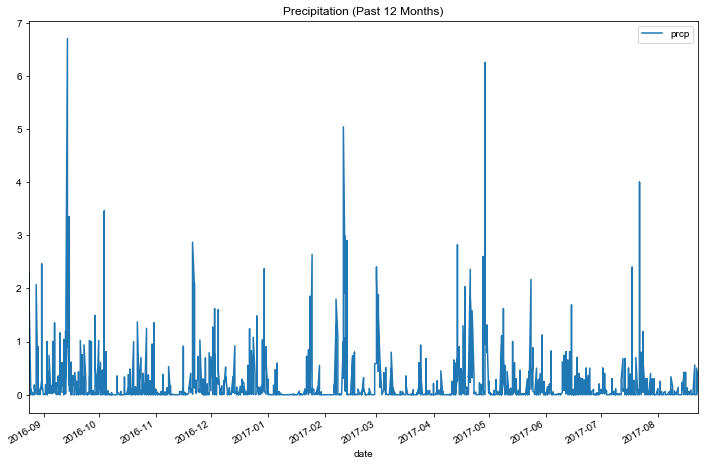

In [62]:
# Use DataFrame.plot() in order to create a bar chart of the data
prcp_df.plot(kind="line", figsize=(12, 8))

# Seaborn default
sns.set()

# Set a title for the chart
plt.title("Precipitation (Past 12 Months)")

plt.show()